#### Pridicting Heart Disease by using Principal Component Analysis (PCA)

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Perform PCA and find the variance from 2 components


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [367]:
#importing necesscary libraries
import pandas as pd #library for operations of dataaframe
import numpy as np  #librar for computution
import matplotlib.pyplot as plt #library for plotting graphs
import seaborn as sns   #library for plotting graphs
import warnings   #library for avoid warnings
warnings.filterwarnings('ignore')

In [368]:
#importing a dataset
df=pd.read_csv(r'C:\Users\HP\Desktop\skillovilla\Machine learning\featurre engineering and regression\assignment\answers\heart.csv')
df.head() #displaying top 5 rows of a dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [369]:
df.tail() #displaying bottom 5 rows of dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [370]:
df.info() #checking datatypes of a column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [371]:
df.describe().transpose() #staststical description of a given data

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


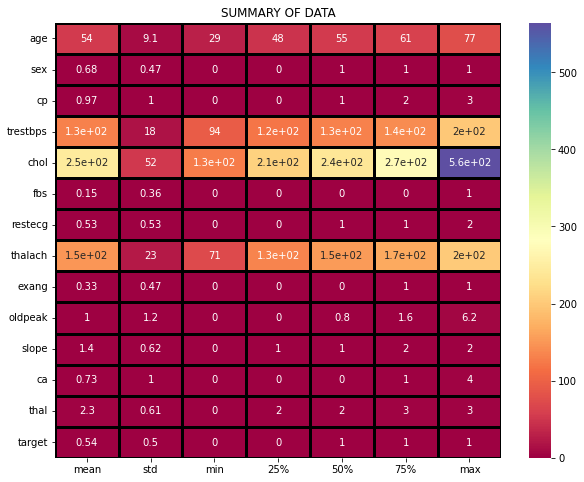

In [372]:
#plotting a description using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.describe()[1:].transpose(),
            annot=True,linecolor="black",
            linewidth=3,cmap=sns.color_palette("Spectral", as_cmap=True))
plt.title("SUMMARY OF DATA")
plt.show()


# Univariate analysis

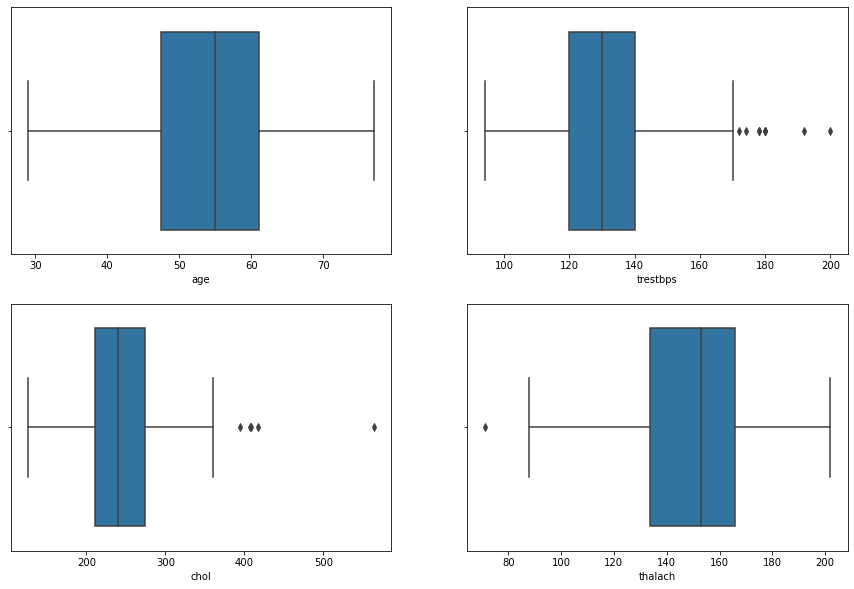

In [373]:
#plotting a box plots to analyze numerical columsn
fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x='age', data = df, ax=axarr[0][0])
sns.boxplot(x='trestbps',data = df, ax=axarr[0][1]) 
sns.boxplot(x='chol', data = df, ax=axarr[1][0])
sns.boxplot(x='thalach',data = df, ax=axarr[1][1])
plt.show()

# Bivariate analysis

<AxesSubplot:xlabel='thal', ylabel='count'>

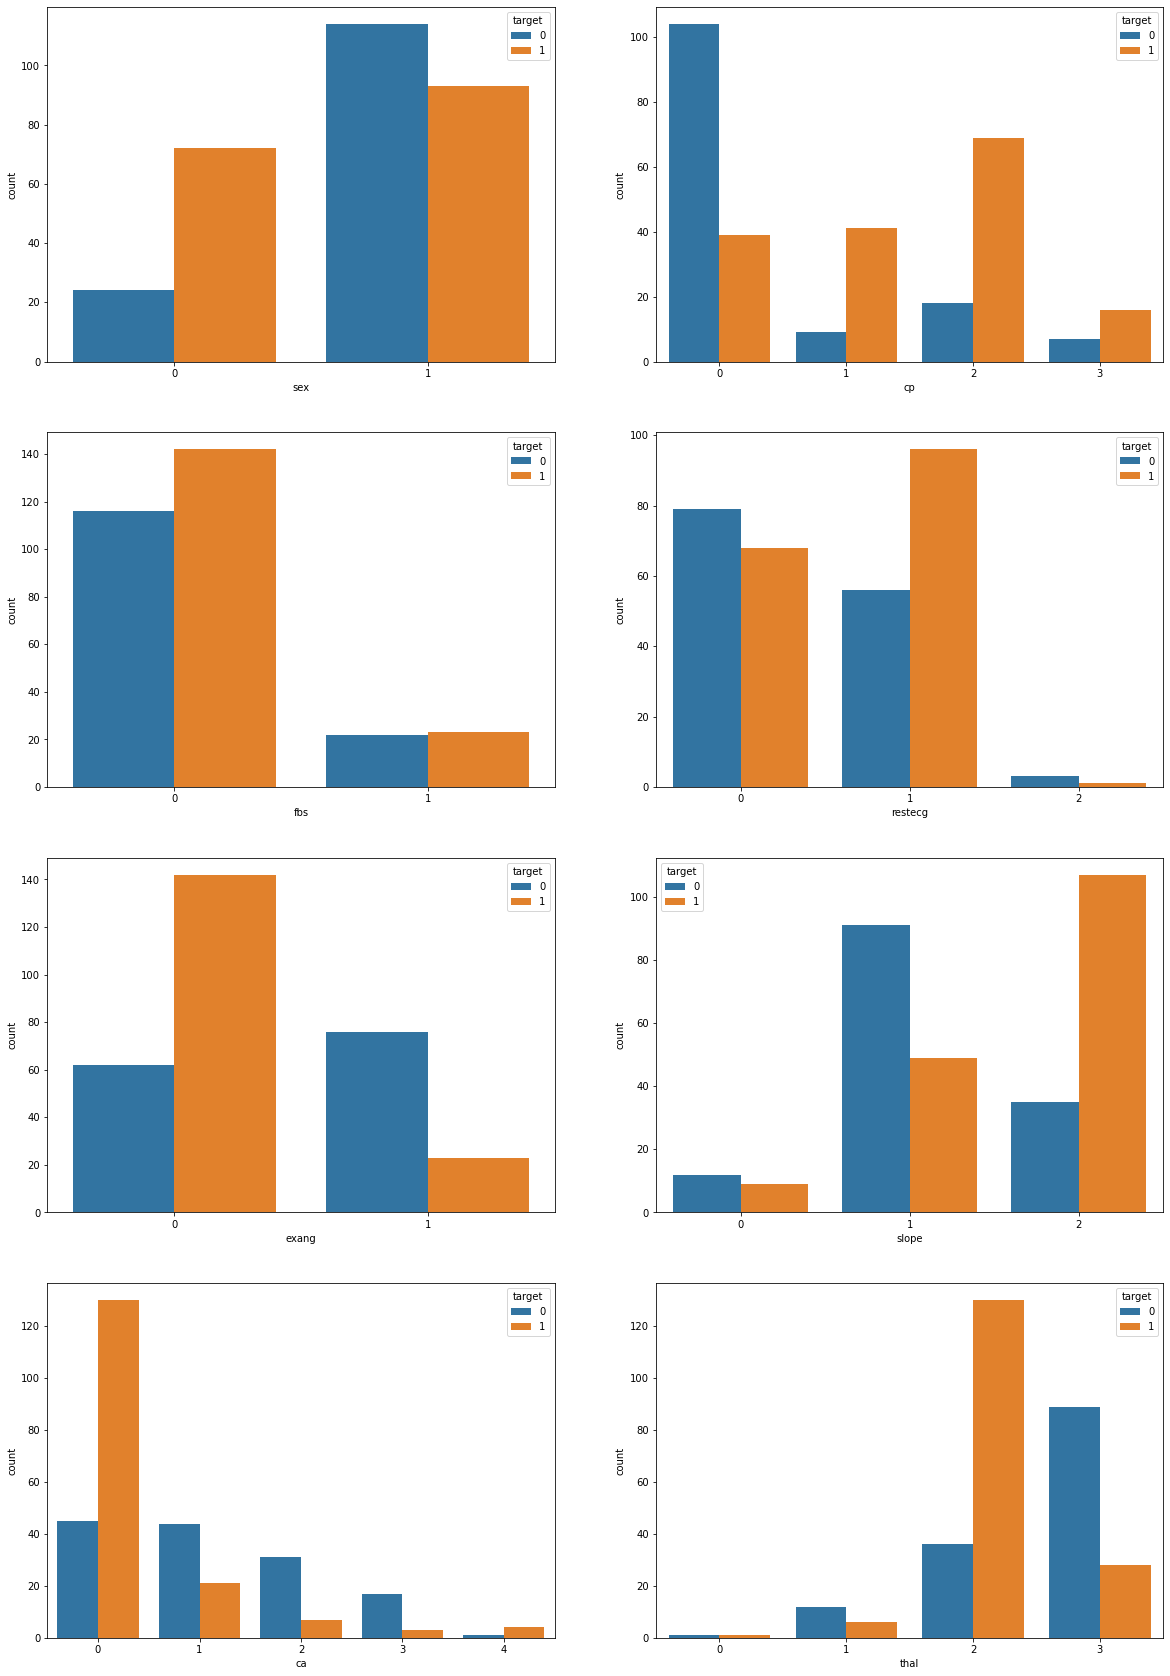

In [374]:
#plotting a count plots with respect to target column
fig, axarr = plt.subplots(4, 2, figsize=(20, 30))
sns.countplot(x='sex', hue = 'target',data = df, ax=axarr[0][0])
sns.countplot(x='cp', hue = 'target',data = df, ax=axarr[0][1]) 
sns.countplot(x='fbs', hue = 'target',data = df, ax=axarr[1][0])
sns.countplot(x='restecg', hue = 'target',data = df, ax=axarr[1][1])
sns.countplot(x='exang', hue = 'target',data = df, ax=axarr[2][0])
sns.countplot(x='slope', hue = 'target',data = df, ax=axarr[2][1]) 
sns.countplot(x='ca', hue = 'target',data = df, ax=axarr[3][0])
sns.countplot(x='thal', hue = 'target',data = df, ax=axarr[3][1])

Inference:
- more age  group of is 55-60
- many persons bp is beteween 120-140
- many people have cholestrrol 240-250
- many people have max heart rate acived(Talach) 160

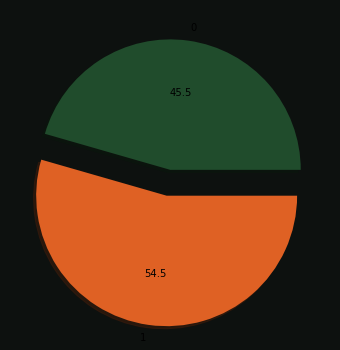

In [402]:
#percentage of target variable
a=df.groupby('target')['target'].count()
a
plt.figure(figsize=(6,6),facecolor='#0D110F')
plt.pie(data=df,x=a,labels={0:'no',1:'yes'},autopct='%.01f',explode=[0,0.2],shadow=True,center=(0, 0),colors=['#204c2c','#df6124'])
plt.grid()
plt.show()

- Dataset as 54.5% of confirmed and 45% non confirmes which indicates data is not imbalanced

<AxesSubplot:>

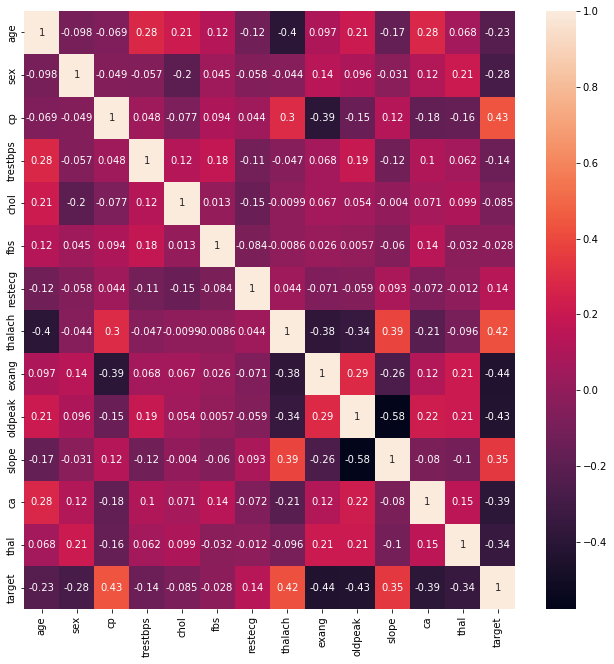

In [404]:
#Heat map for correlation
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(),annot=True,fmt='.2g')

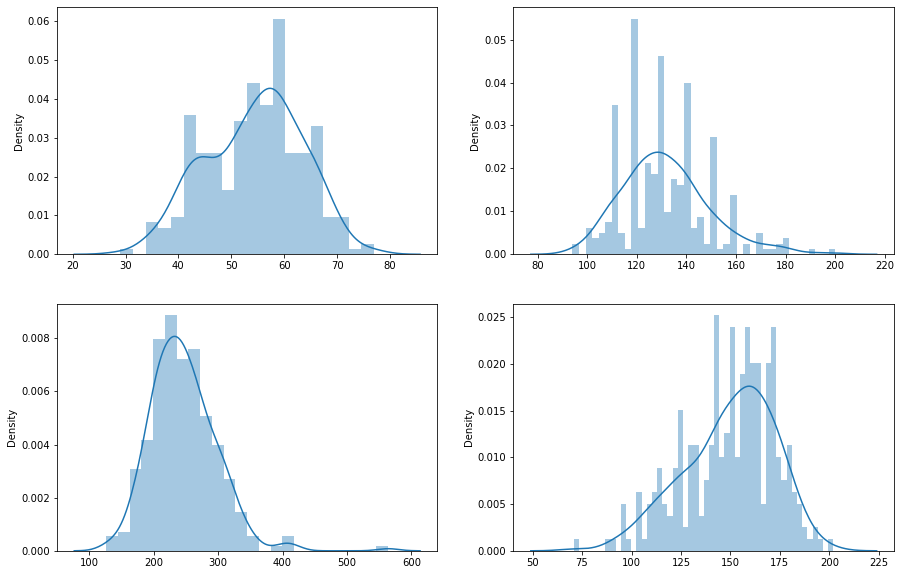

In [376]:
##distribution of numerical variable
fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(x=df['age'],bins=20,label=['AGE'],ax=axarr[0][0],kde=True)
sns.distplot(x=df['trestbps'],bins=40,label=['trestbps'],ax=axarr[0][1],kde=True) 
sns.distplot(x=df['chol'],label=['chol'],ax=axarr[1][0],kde=True)
sns.distplot(x=df['thalach'],bins=50,label=['thalach'],ax=axarr[1][1],kde=True)
plt.show()

# Model building without PCA

In [377]:
df_copy1=df

In [378]:
df_copy1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [379]:
x=df_copy1.drop('target',axis=1)
y=df_copy1['target']

In [380]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(x)
x=scale.transform(x)


In [381]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [382]:
#shape after train and splitting a data
print("shape of x_train:",x_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (212, 13)
shape of x_test: (91, 13)
shape of y_train: (212,)
shape of y_test: (91,)


Accuracy score is:  0.8132
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Confusion Matrix: 
The time of execution of above program is : 293.23649406433105 ms


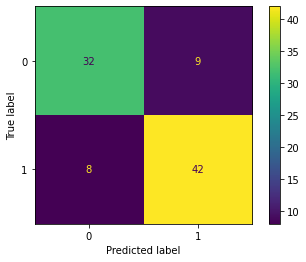

In [383]:
from sklearn.ensemble import RandomForestClassifier
import time
start=time.time()
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred3 = rf.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,roc_curve,auc
print('Accuracy score is: ',round(accuracy_score(y_test,pred3),4))
print("============================================")
print('Classification report: \n',classification_report(y_test,pred3))
print("============================================")
print('Confusion Matrix: \n',plot_confusion_matrix(rf,x_test,y_test))
end = time.time()
print("The time of execution of above program is :",(end-start) * 10**3, "ms")

for 13 features Random Forest classifier has shown accuracy of 81%  


# Modeling using PCA

In [384]:
#coping data due to save original data
df_copy2=df
df_copy2.head() #new head of copied data 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:title={'center':'Correlation with Target'}>

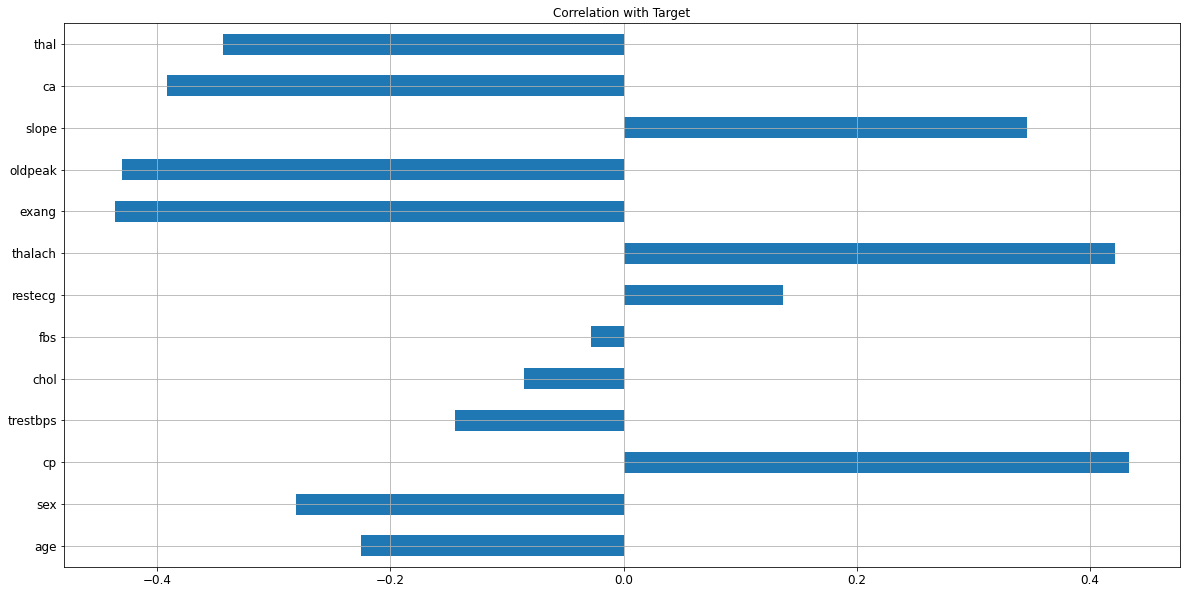

In [385]:
#checking correlation with target variable
X=df.drop(['target'],axis=1)
X.corrwith(df['target']).plot.barh(
figsize = (20, 10), title = "Correlation with Target", fontsize = 12,
rot = 0, grid = True)

In [386]:
#splitting a data into x&y
x=df_copy2.drop('target',axis=1)
y=df_copy2['target']

In [387]:
# implementing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = pca.fit_transform(x)

In [388]:
#arrainging principal components into a dataset
principalDf = pd.DataFrame(data = x , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-12.267345,2.873838
1,2.690137,-39.871374
2,-42.950214,-23.636820
3,-10.944756,-28.438036
4,106.979053,-15.874468


In [389]:
#principal component elements with target variable
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,-12.267345,2.873838,1
1,2.690137,-39.871374,1
2,-42.950214,-23.636820,1
3,-10.944756,-28.438036,1
4,106.979053,-15.874468,1


In [390]:
#eplained varience ratio or Eigen values of PCA
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.7475642 , 0.15037022])

 By using the attribute explained_variance_ratio_, you can see that the first principal component contains 74.75% of the variance and the second principal component contains 15.03% of the variance. Together, the two components contain 89.78% of he information.

In [391]:
pca.components_.shape

(2, 13)

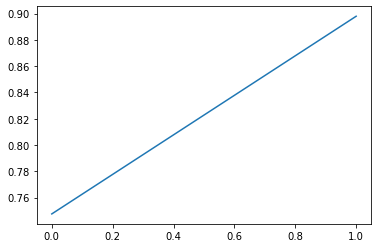

In [392]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Model building for n=2 components

In [393]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)


In [394]:
#shape after train and splitting a data
print("shape of x_train:",x_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (212, 2)
shape of x_test: (91, 2)
shape of y_train: (212,)
shape of y_test: (91,)


Accuracy score is:  0.7033
Classification report: 
               precision    recall  f1-score   support

           0       0.63      0.83      0.72        41
           1       0.81      0.60      0.69        50

    accuracy                           0.70        91
   macro avg       0.72      0.71      0.70        91
weighted avg       0.73      0.70      0.70        91

Confusion Matrix: 
The time of execution of above program is : 230.7283878326416 ms


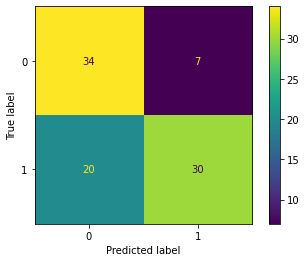

In [395]:

from sklearn.ensemble import RandomForestClassifier
import time
start=time.time()
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred3 = rf.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,roc_curve,auc
print('Accuracy score is: ',round(accuracy_score(y_test,pred3),4))
print("============================================")
print('Classification report: \n',classification_report(y_test,pred3))
print("============================================")
print('Confusion Matrix: \n',plot_confusion_matrix(rf,x_test,y_test))
end = time.time()
print("The time of execution of above program is :",(end-start) * 10**3, "ms")

# Hyperparametric tuning for best results

In [396]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [397]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [398]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}  



Accuracy score is:  0.7253
Classification report: 
               precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91

Confusion Matrix: 


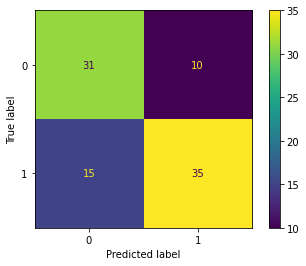

In [400]:

rf = RandomForestClassifier(n_estimators= 20, min_samples_split= 6,min_samples_leaf=3,max_features='auto',max_depth=70,bootstrap=True)
rf.fit(x_train,y_train)
pred3 = rf.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,roc_curve,auc
print('Accuracy score is: ',round(accuracy_score(y_test,pred3),4))
print("============================================")
print('Classification report: \n',classification_report(y_test,pred3))
print("============================================")
print('Confusion Matrix: \n',plot_confusion_matrix(rf,x_test,y_test))

With the parameters tuning model gave accuracy of 72% with 2 components and computing time is also reduced.
